# figure 5, continuous 

In [13]:
import numpy as np
from scipy.integrate import odeint  
from operator import sub 
import controlpy   
import pickle

from matplotlib import  rc    
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import rcParams

import  phasediagram as phd
import  singlependulum as sp  
# import dynamicpendulums.figureparam as fp

from figure_settings import *     
import figure_functions as ff 

In [14]:
# General Plotting Parameters  
fig_dim = (3.2,3)  
fig_name = 'fig5_continuous'
boost_col = 'c'
LQR_limit = 0.3

In [15]:
 
def pendulum_dynamics( y_n, t , K  ):
    L = 1. 
    mp = 1. 
    g = -10.
    b = 0.01
    y_f = np.array([np.pi,0]) 
    u = np.clip( np.dot( K,(y_f -y_n) ) ,-3,3)  
    
    fy = np.zeros(y_n.shape)    
    fy[0]=    y_n[1]  
    fy[1] =    mp*L*g/(mp*L**2)*np.sin( y_n[0] ) -b/(mp*L**2)*y_n[1] + u/(mp*L**2)
    return fy

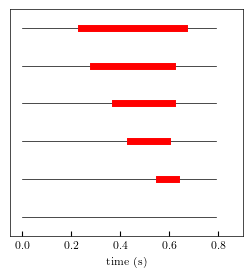

In [16]:
# visible_x = np.array([-1,1])*0.3+np.pi
dt = 0.01; 
# tLast = 4
# tInt = np.arange(0,tLast+dt, dt)    

def plot_u_trajectories( ax_p ):
    
    with open('u_grouping.pkl', 'rb') as f:
        mynewlist = pickle.load(f)
    u_param, dth_start, dth_end = mynewlist 
     
    for j, arr in enumerate( u_param ): 
        t1= arr[0]
        tau = arr[1] 

        t_end = 0.8
        tInt = np.arange(0,t_end,dt) 
        u = np.zeros( (len(tInt) ))
        bool_on = (tInt>t1) & (tInt < (t1+tau) )
        u[bool_on]= -3

        ax_p.plot( tInt, u*0 + j ,'k',linewidth=0.5)

        ax_p.plot( tInt[bool_on], u[bool_on]*0+j, color=ff_col ,linewidth=5 ) 

    ax_p.set_ylim([-0.5,j+0.5]) 
    ax_p.set_xlim([-0.05, 0.9]) 
    ax_p.set_xlabel('time (s) ') 
    ax_p.yaxis.set_ticks([]) 
    

    return( ax_p)  

fig,ax = plt.subplots(1,1, figsize= (3,3) ,dpi = 100)
plot_u_trajectories( ax ) 

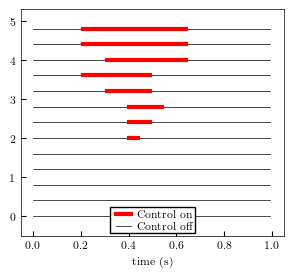

In [17]:
fig, ax  = plt.subplots(1,1,figsize= (3.4,3) ,dpi=100)  

def plot_line_npy( ax_p ):
#     filename= 'ugrouping_learned.npy'
    filename='ugrouping_learned_V2.npy'
    U_mat = np.load(filename  )  

    for j in range( U_mat.shape[0] ): 
        y0 = U_mat[j,0]
        t1 = U_mat[j,1] 
        tau = U_mat[j,2]   
        t_end = 1.
        tInt = np.arange(0,t_end,dt) 
        u = np.zeros( (len(tInt) ))
        bool_on = (tInt>t1) & (tInt < (t1+tau) )
        u[bool_on]= -3

        ax_p.plot( tInt, u*0 + y0,'k',linewidth=0.5)
        ax_p.plot( tInt[bool_on], u[bool_on]*0+ y0, color=ff_col ,linewidth=3 ) 

        ax_p.set_ylim([-0.5, U_mat[-1,0]+0.5]) 
        ax_p.set_xlim([-0.05, 1.05]) 
        ax_p.set_xlabel('time (s) ') 
#         ax_p.yaxis.set_ticks([]) 
        
    
#     ax_p.yaxis.set_major_locator( plt.MultipleLocator(4) ) 
        
    ax_p.plot([-5,-5,],[-5,-4],color=ff_col,label='Control on',linewidth=3)
    ax_p.plot([-5,-5,],[-5,-4],'k',label='Control off',linewidth=0.5,)
    ax_p.legend( fontsize = 8,loc='lower center')
    
plot_line_npy( ax) 

In [18]:
 # xx = pickle.load('filename.pickle')
# with open('filename.pickle', 'rb') as handle:
with open('u_continuous_uparam.pickle', 'rb') as handle:
    b = pickle.load(handle)
    
y_data = b[0]
u_data = b[1] 

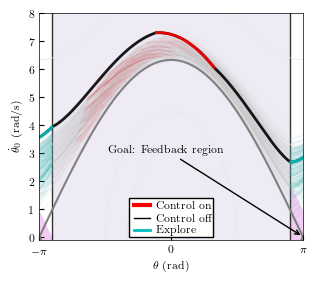

In [19]:

def plot_line( ax_p, y_temp, u_temp, alpha = 0.05, line_col = line_col,linewidth=1):
    y0_i= np.where( y_temp[:,0] > -np.pi+0.3  )[0][0] + 1
    y1_i= np.where( y_temp[:,0] >  np.pi-0.3  )[0][0]
    y0 = y_temp[y0_i,:]
    
    x_u =  y_temp[y0_i:y1_i,0]
    y_u =   u_temp[y0_i:y1_i]*0.1 +  y0[1]
    
    bool_LQR1 = (np.abs(u_temp)>0.1) & (  np.arange( len(u_temp) )< (y0_i-1) )
    bool_LQR2 = (np.abs(u_temp)>0.1) & (  np.arange( len(u_temp) ) > (y1_i-1) )
    bool_ff = (np.abs(u_temp)>0.1) & (  np.arange( len(u_temp) )> (y0_i-1) ) & (  np.arange( len(u_temp) )< (y1_i-1) )
    
    ax_p.plot( y_temp[:,0], y_temp[:,1],
               linewidth = linewidth, color=line_col,zorder = -1 , alpha = alpha ) 
    ax_p.plot( y_temp[bool_LQR1,0], y_temp[bool_LQR1,1] ,
               linewidth = linewidth,  color=boost_col , alpha = alpha )
    ax_p.plot( y_temp[bool_LQR2,0], y_temp[bool_LQR2,1] ,
               linewidth = linewidth,   color= boost_col , alpha = alpha ) 
    ax_p.plot( y_temp[bool_ff,0], y_temp[bool_ff,1] ,
               linewidth = linewidth,     color=u_col , alpha = alpha )
    return( ax_p ) 

def plot_many_lines( ax_p):  
    n_lines = 200
    line_col = np.ones((3,))*0.8
    thin_line = np.ones((3))*0.8

    y_p = y_data 
    u_p = u_data 
    plot_array = []
    u_array = []
    split_locs = np.where( np.abs(np.diff( y_p[:,0]) ) > 6 )[0]
    split_locs = np.insert(split_locs,0,0)
    split_locs = np.insert(split_locs,len(split_locs),len(y_p) )  + 1
    for j in range(len(split_locs)-1 ): 
        plot_array.append( y_p[split_locs[j]:split_locs[j+1]  ,:] )  
        u_array.append( u_p[split_locs[j]:split_locs[j+1]   ] )  

    # AX  ---------------------------------------------
    for j in range( n_lines):
        y_temp = plot_array[j]
        u_temp = u_array[j ]
        plot_line(ax_p,y_temp, u_temp , line_col=thin_line ) 

    # do one highlight  ---------------------------------------------     
    j = n_lines + 51
    y_temp = plot_array[j]
    u_temp = u_array[j ] 
    plot_line(ax_p,y_temp, u_temp , alpha = 0.9, line_col='k',linewidth =2)

    phd.homoclinic_plot(ax_p,col=homoclinic_col) 
    ax_p.set_xlim( [-np.pi,np.pi])
    ax_p.set_ylim([-3,9])
 
    ax_p.set_xlim([-np.pi,np.pi ]) 
    
    ax_p.xaxis.set_major_locator(plt.MultipleLocator(np.pi )) 
    ax_p.xaxis.set_major_formatter(plt.FuncFormatter(phd.multiple_formatter()))  
    
    L = 20
    rectangle_order = -5
    rectangle1 = plt.Rectangle( ( -np.pi+0.3,-L/2), 2*np.pi-0.6,L, 
                                zorder=rectangle_order ,facecolor=obscure_col, edgecolor=obscure_edge ,alpha = obscure_alpha) 
    ax_p.add_patch(rectangle1)
    
        
    ax_p.plot([-5,-5,],[-5,-4],color=ff_col,label='Control on',linewidth=3)
    ax_p.plot([-5,-5,],[-5,-4],'k',label='Control off',linewidth=1 )
    ax_p.plot([-5,-5,],[-5,-4],color=boost_col,label='Explore',linewidth=2 )
    ax_p.legend(loc='lower center',fontsize = 8)
    
    
    ax_p.annotate('Goal: Feedback region', (np.pi,0), (-1.5,3),arrowprops=dict(arrowstyle='->') , fontsize = annotate_font) 

    dx =  LQR_limit 
    x_points = np.array([-dx, dx, dx, -dx])+np.pi
    y_points = np.array([1.,0,-1.,0])*1.88
    ax_p.fill( x_points-2*np.pi, y_points,facecolor=lqr_fill, zorder = -6,alpha=0.2 )
    ax_p.fill( x_points , y_points,facecolor=lqr_fill, zorder = -6,alpha=0.2,)

    

    ff.plot_add_contours(ax_p) 

    ax_p.set_xlabel(r'$\theta$ (rad)') 
    ax_p.set_ylabel(r'$\dot{\theta}$ (rad/s)')
    ax_p.set_ylim([-0.1,8])  

    ax_p.set_ylabel(r'$\dot{\theta}_0$ (rad/s)' )


    return( ax_p ) 

fig, ax  = plt.subplots(1,1,figsize= (3.4,3) ,dpi=100)  
plot_many_lines(ax)   

Text(0, 0.5, '$\\dot{\\theta}_0$ (rad/s)')

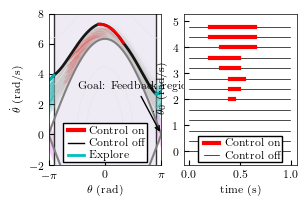

In [20]:

fig_dim = (3.2,2)
fig, (ax,ax2) = plt.subplots(1,2,figsize=fig_dim ,dpi=100)  

plot_many_lines(ax)   
plot_line_npy( ax2) 


ax.set_xlabel(r'$\theta$ (rad)') 
ax.set_ylabel(r'$\dot{\theta}$ (rad/s)')
ax.set_ylim([-2,8]) 
ax2.set_ylabel(r'$\dot{\theta}_0$ (rad/s)' )
  

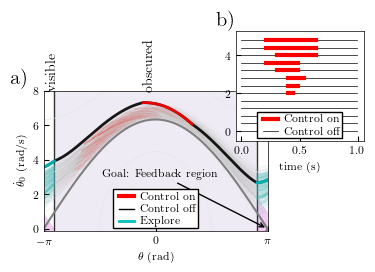

In [21]:
fig = plt.figure( figsize= fig_dim,dpi = 100) 

ax = plt.axes([ 0 , 0 , .7  ,  .7] )   
ax1= plt.axes([ .6, .45, .4 , .55] )    


plot_many_lines(ax)  

plot_line_npy( ax1)   

yl = 9.5
ax .text( -np.pi ,yl,'visible',rotation = 90 ) 
ax.text( -.4 ,yl+ .85,'obscured',rotation = 90  ) 
                 
label_dict = dict( fontsize = 15 , fontweight='bold' )   
ff.label_axes(fig,labels =['a)','b)','c)','d)'], loc=(-0.15,1.05 ) , **label_dict  ) 
 
# plt.savefig('./figs/' + fig_name + '.png',
#         format='png', dpi=300, 
#         bbox_inches = 'tight', pad_inches = 0,
#         )
# plt.savefig('./figs/' + fig_name + '.svg',
#         format='svg',  
#         bbox_inches = 'tight', pad_inches = 0,
#         ) 

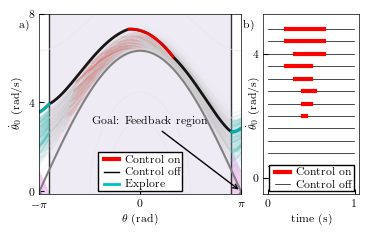

In [ ]:

fig_dim = (3.2,1.8) 
fig = plt.figure( figsize= fig_dim,dpi = 100) 

ax = plt.axes([ 0 , 0 , .63 ,  1] )   
ax1= plt.axes([ .7, .0, .3 , 1] )    


plot_many_lines(ax)  
ax.yaxis.set_major_locator( plt.MultipleLocator(4) ) 
ax1.yaxis.set_major_locator( plt.MultipleLocator(4) ) 

plot_line_npy( ax1)   


ax1.set_ylabel( r'$\dot{\theta}_0$ (rad/s)' ,va='top'  )
yl = 9.5
# ax .text( -np.pi ,yl,'visible',rotation = 90 ) 
# ax.text( -.4 ,yl+ .85,'obscured',rotation = 90  ) 
                 
label_dict = dict( fontsize = 8 , fontweight='bold' )   
# ff.label_axes(fig,labels =['a)','b)','c)','d)'], loc=(-0.15,.95 ) , **label_dict  ) 
ff.label_axes2(fig,labels =['a)','b)','c)','d)'], loc=(-0.2,0.92 ) , **label_dict   )
 
    
# # # # # save fig  -----------------------------------------------------------------------
save_fig = False
if save_fig: 
    plt.savefig('./figs/' + fig_name + '.png',
            format='png', dpi=300,
            transparent=  True,             
            bbox_inches = 'tight', pad_inches = 0,
            )
    plt.savefig('./figs/' + fig_name + '.svg',
            format='svg',  transparent= True,
            bbox_inches = 'tight', pad_inches = 0,
            )   
    plt.savefig('./figs/' + fig_name + '.pdf',
            format='pdf',  transparent= True, 
            bbox_inches = 'tight', pad_inches = 0,
            )  
    plt.close()